In [1]:
m = 1450
r = 1.22
J = m*r*r
l1 = 1.4
l2 = 1.7
k1 = 35000
k2 = 38000

In [2]:
M = matrix(CDF, [[m,0], [0,J]])
K = matrix(CDF, [[k1+k2, k2*l2-k1*l1], [k2*l2-k1*l1, k1*l1^2 + k2*l2^2]])

In [3]:
D, P = K.eigenmatrix_right(M)

In [4]:
omegasqr = D.diagonal()
omega1 = sqrt(omegasqr[0])
omega2 = sqrt(omegasqr[1])

In [5]:
P

[  0.9788388039617306   0.2971091359441775]
[-0.20463283182023556   0.9548435271490844]

In [6]:
w = var('omega')

A = -w^2*M + K
resp1 = A.inverse()*vector([1,0])

x_resp1 = resp1[0]
theta_resp1 = resp1[1]

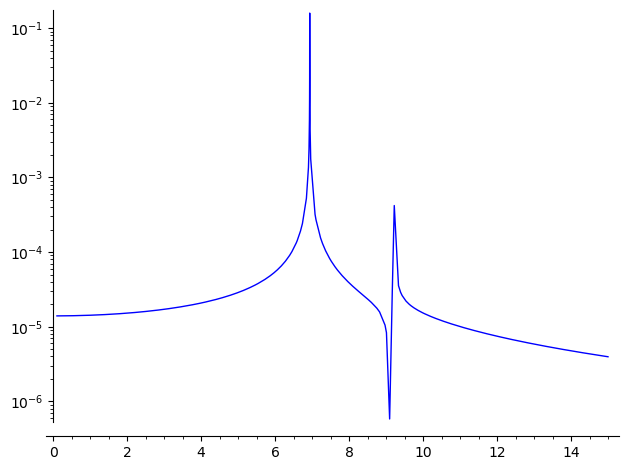

In [7]:
bounce_physical_plot = plot_semilogy(abs(x_resp1), (0.1, 15))
show(bounce_physical_plot)

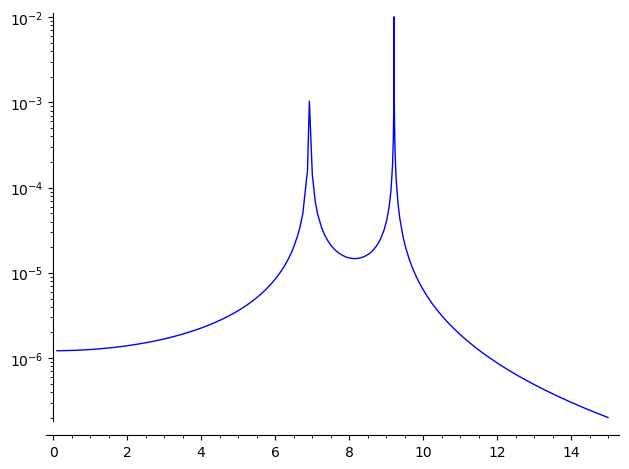

In [8]:
pitch_physical_plot = plot_semilogy(abs(theta_resp1), (0.1,15))
show(pitch_physical_plot)

In [9]:
var('x1', 'x2')
v = vector([x1, x2])
num = v*K*v
den = v*M*v

R = num/den
R

((73000.0*x1 + 15600.0*x2)*x1 + (15600.0*x1 + 178419.99999999997*x2)*x2)/(1450.0*x1^2 + 2158.18*x2^2)

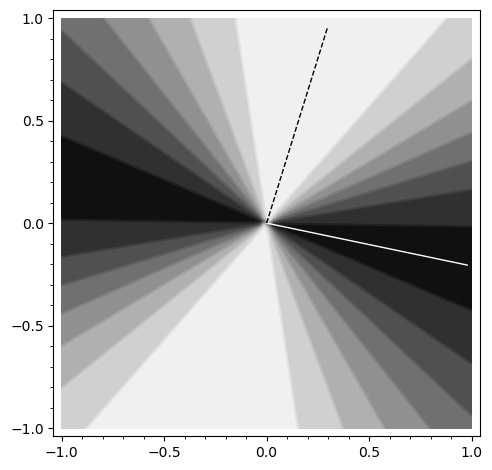

In [10]:
p1 = contour_plot(R, (x1, -1, 1), (x2, -1, 1))
p2 = line([0,0, (P[0,0], P[1,0])], color='white')
p3 = line([0,0, (P[0,1], P[1,1])], color='black', linestyle='dashed')
show(p1+p2+p3)

In [11]:
P.transpose()*M*P

[     1479.6547512952632 -2.8421709430404007e-13]
[-1.7053025658242404e-13      2095.6662329367014]

In [12]:
junk = P.transpose()*M*P
Modal_Mass1 = junk[0,0]
Modal_Mass2 = junk[1,1]

In [13]:
phi11 = P[0,0]/sqrt(Modal_Mass1)
phi21 = P[1,0]/sqrt(Modal_Mass1)

phi12 = P[0,1]/sqrt(Modal_Mass2)
phi22 = P[1,1]/sqrt(Modal_Mass2)

phi = matrix([[phi11, phi12], [phi21, phi22]])

phi.transpose()*M*phi

[     0.9999999999999998 -1.1102230246251565e-16]
[-1.6653345369377348e-16      1.0000000000000002]

In [14]:
show(phi.transpose()*K*phi)

[     48.09566561051351 -5.329070518200751e-15]
[-7.105427357601002e-15      84.92067222970374]

In [15]:
show(omegasqr)

[48.09566561051351, 84.9206722297037]

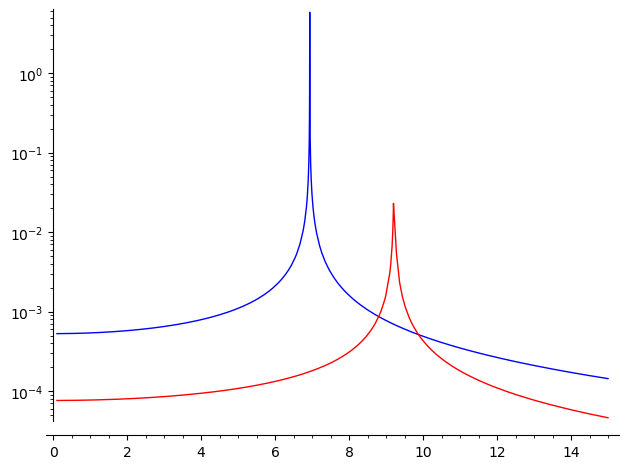

In [16]:
Force = vector([1,0])
Modal_force_vector = phi.transpose()*Force

y1 = Modal_force_vector[0]/(-w^2 + omega1^2)
y2 = Modal_force_vector[1]/(-w^2 + omega2^2)

p1 = plot_semilogy(abs(y1), (0.1, 15), color='blue')
p2 = plot_semilogy(abs(y2), (0.1, 15), color='red')

show(p1+p2)

In [19]:
disp_modal = phi*vector([y1, y2])

bounce_modal = disp_modal[0]
pitch_modal = disp_modal[1]

bounce_modal_plot = plot_semilogy(abs(bounce_modal), (0.1, 15), color='red', linestyle='dashed')
pitch_modal_plot = plot_semilogy(abs(pitch_modal), (0.1, 15), color='red', linestyle='dashed')

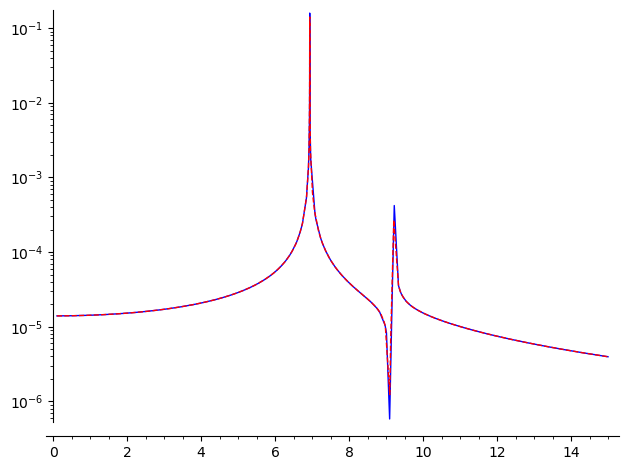

In [20]:
show(bounce_physical_plot+bounce_modal_plot)

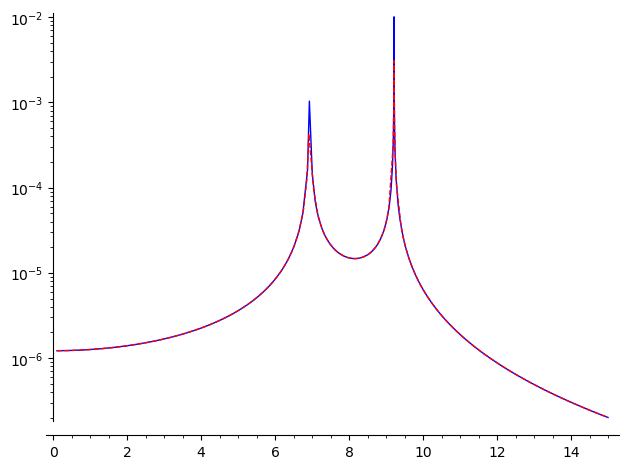

In [21]:
show(pitch_physical_plot+pitch_modal_plot)